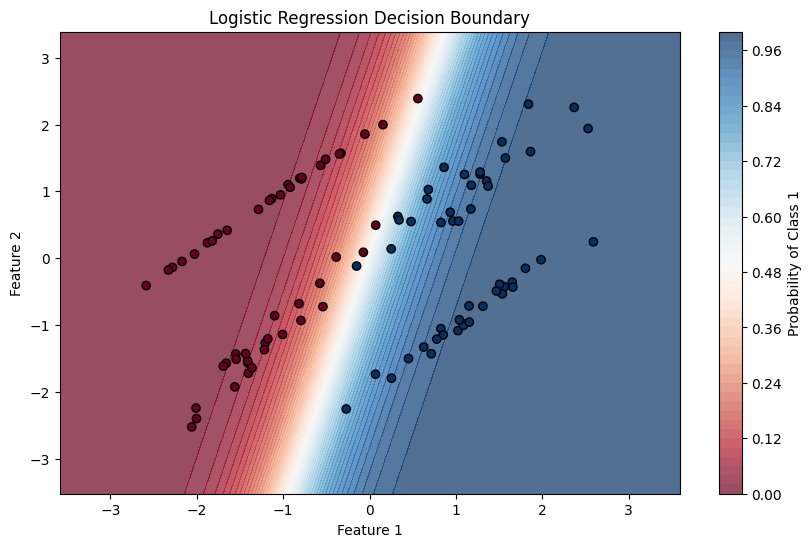

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Create a grid of values
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))

# Predict probabilities for the grid
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=50, cmap='RdBu', alpha=0.7)
plt.colorbar(label='Probability of Class 1')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='RdBu', marker='o')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

C:\Users\SUPRATIM NAG\AppData\Local\Temp\ipykernel_8564\1278640985.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['Diagnosis'] = numerical_data['Diagnosis'].apply(
c:\Users\SUPRATIM NAG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


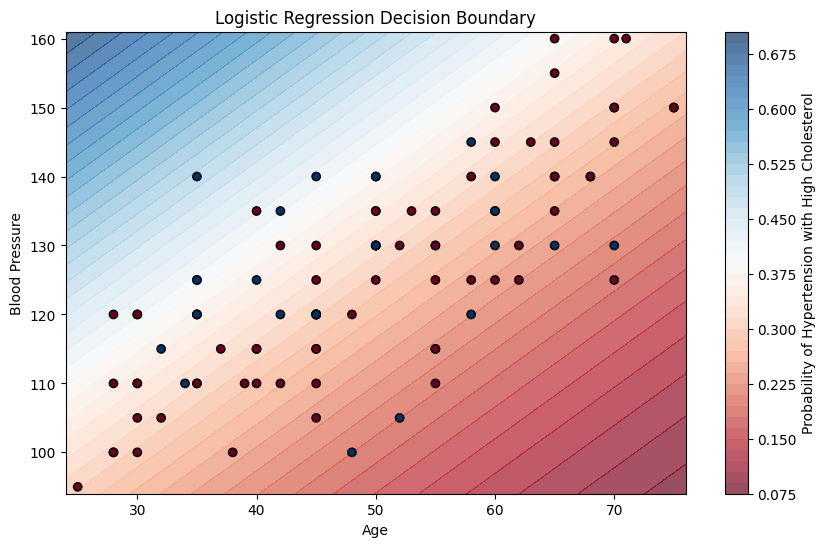

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_csv(r"C:\Users\SUPRATIM NAG\OneDrive\Documents\ML\Personal_Datasets\Dataset.csv")

# Select the relevant variables
numerical_data = data[['Age', 'Blood Pressure', 'Cholesterol Levels', 'Heart Rate', 'BMI', 'Diagnosis']]

# Encode the diagnosis variable (assuming it's a binary classification)
numerical_data['Diagnosis'] = numerical_data['Diagnosis'].apply(
    lambda x: 1 if 'Hypertension' in x  else 0
)

# Prepare input and output variables
X = numerical_data[['Age', 'Blood Pressure']]  # Select only the relevant features
y = numerical_data['Diagnosis']

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Create a grid of values for plotting
xx, yy = np.meshgrid(np.linspace(X['Age'].min()-1, X['Age'].max()+1, 100),
                     np.linspace(X['Blood Pressure'].min()-1, X['Blood Pressure'].max()+1, 100))

# Predict probabilities for the grid
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=50, cmap='RdBu', alpha=0.7)
plt.colorbar(label='Probability of Hypertension with High Cholesterol')
plt.scatter(X['Age'], X['Blood Pressure'], c=y, edgecolors='k', cmap='RdBu', marker='o')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

C:\Users\SUPRATIM NAG\AppData\Local\Temp\ipykernel_8564\690691177.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['Diagnosis'] = numerical_data['Diagnosis'].apply(
c:\Users\SUPRATIM NAG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


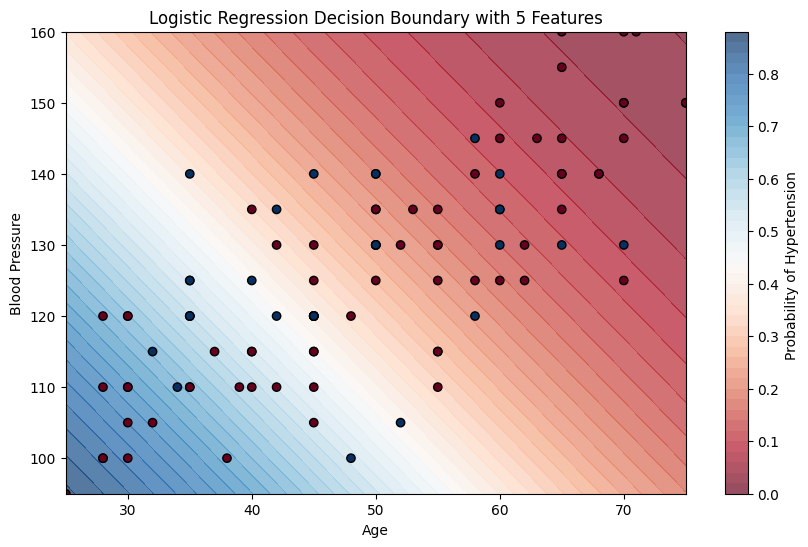

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r"C:\Users\SUPRATIM NAG\OneDrive\Documents\ML\Personal_Datasets\Dataset.csv")

# Select the relevant variables
numerical_data = data[['Age', 'Blood Pressure', 'Cholesterol Levels', 'Heart Rate', 'BMI', 'Diagnosis']]

# Encode the diagnosis variable (1 for Hypertension with high cholesterol, 0 for others)
numerical_data['Diagnosis'] = numerical_data['Diagnosis'].apply(
    lambda x: 1 if 'Hypertension' in x  else 0
)

# Prepare input and output variables
X = numerical_data[['Age', 'Blood Pressure', 'Cholesterol Levels', 'Heart Rate', 'BMI']]
y = numerical_data['Diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y)

# Create a grid for plotting
age_range = np.linspace(X['Age'].min(), X['Age'].max(), 100)
bp_range = np.linspace(X['Blood Pressure'].min(), X['Blood Pressure'].max(), 100)
cholesterol_range = np.linspace(X['Cholesterol Levels'].min(), X['Cholesterol Levels'].max(), 100)

# Create a meshgrid for Age and Blood Pressure
xx, yy = np.meshgrid(age_range, bp_range)

# Prepare a grid for predictions
Z = np.zeros((len(xx.ravel()), 5))  # 5 features
Z[:, 0] = xx.ravel()  # Age
Z[:, 1] = yy.ravel()  # Blood Pressure
Z[:, 2] = np.mean(X['Cholesterol Levels'])  # Average Cholesterol Levels
Z[:, 3] = np.mean(X['Heart Rate'])  # Average Heart Rate
Z[:, 4] = np.mean(X['BMI'])  # Average BMI

# Standardize the grid
Z_scaled = scaler.transform(Z)

# Predict probabilities for the grid
Z_prob = model.predict_proba(Z_scaled)[:, 1]
Z_prob = Z_prob.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_prob, levels=50, cmap='RdBu', alpha=0.7)
plt.colorbar(label='Probability of Hypertension ')
plt.scatter(X['Age'], X['Blood Pressure'], c=y, edgecolors='k', cmap='RdBu', marker='o')
plt.title('Logistic Regression Decision Boundary with 5 Features')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()